In [11]:
# Лабораторна робота 1
# Селюков Денис КН 222г
# Дослідження та візуалізація даних за допомогою Python
# Мета: отримати базові навики використання Python для дослідження та візуалізації даних
# Завдання:
# 1. Встановіть Jupyter notebook через pip або Anaconda Distribution.
# 2. Завантажте russia_losses_equipment.csv файл з сайту Kaggle.com https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war
# 3. Виберіть один варіант для цієї лабораторної роботи, використовуючи формулу
# N = ord("LLL") % 3 + 1,
# де N – це номер варіанту, LLL – це перша літера вашого імені.
# 4. Поради:
# a. Використовуйте csv.reader()функцію для читання файлу csv.
# b. Пропустіть перший рядок (із заголовками стовпців).
# c. Не використовуйте цикли чи інші ітераційні конструкції для обробки масивів numpy. Використовуйте лише зрізи та/або універсальні (векторизовані) функції.
# d. Створіть функції до завдань 3-7 кожного варіанта.
# 5. Вимоги до графіків:
# a. встановити тип лінії (пунктирна, пунктирна тощо);
# b. графіки повинні бути підписані;
# c. додайте легенду;
# d. додати сітку та вказати колір і тип ліній;
# e. додайте назву графіку, позначки осей і значення но осях;
# f. змінити розмір графіку (наприклад, 8x16 дюймів) і розподільну здатність (наприклад, 100 dpi);
# g. зберегти графік у файл формату png.

# Варіант 3. Дослідження втрат бронетранспортерів (БТР).
#1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.
#2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).
#3. Знайдіть добові втрати БТР.
#4. Знайдіть 5 найбільших добових втрат БТР.
#5. Визначте, скільки БТР було знищено влітку 2023 року.
#6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.
#7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

In [15]:
# Посилання на GitHub, де знаходится проект і можна побачити фото.
# 

In [6]:
N = ord("D") % 3 + 1
print("Ваш номер варіанту:", N)

Ваш номер варіанту: 3


Перші 5 значень з стовпця 'APC': [18523 18487 18470 18450 18433]


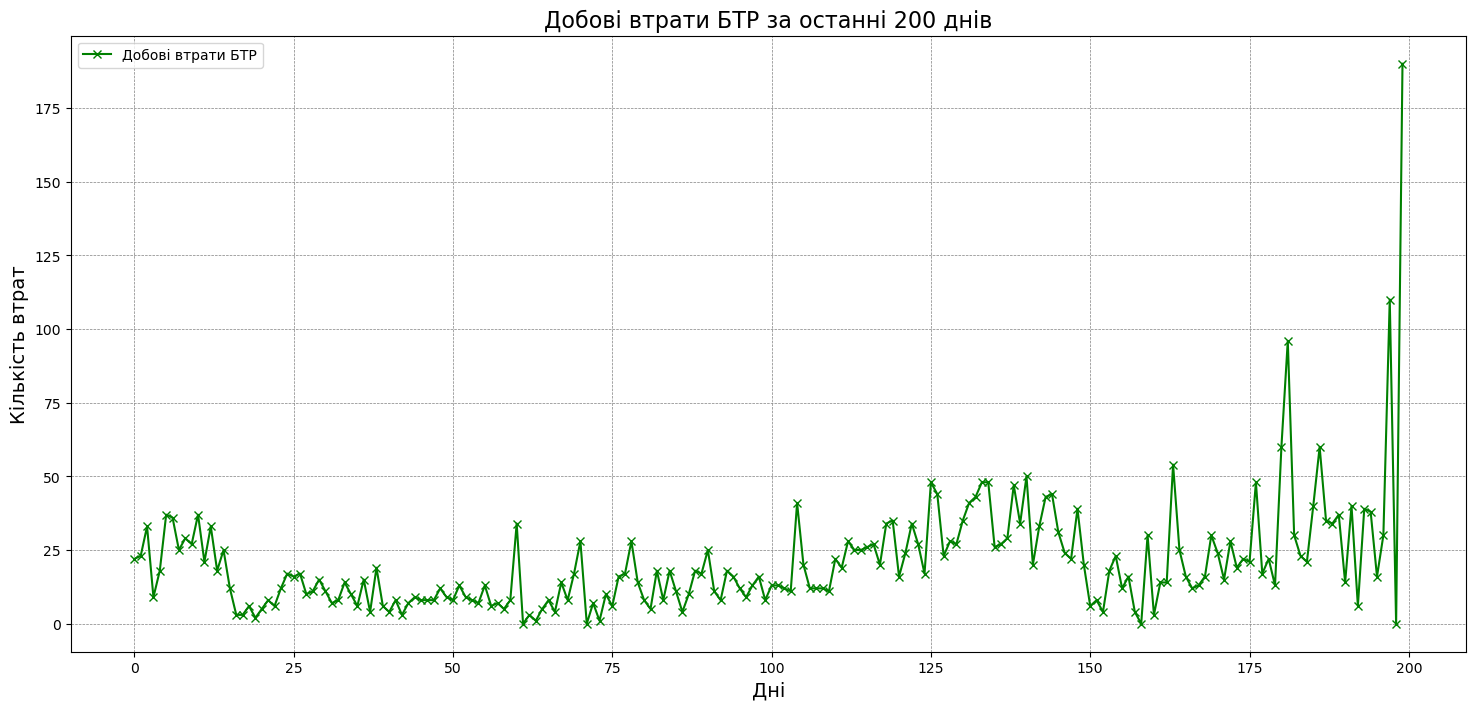

5 найбільших добових втрат: [91, 96, 110, 120, 190]
Загальний збиток за літо 2023 року: 1126
Середнє значення втрат за 100-500 днів: 20.67581047381546
Усі добові втрати: [ 36  17  20  17  29   9  40  23  45  33  25  30  24  64  39  19  51  33
  30  44  19  49  27  35  14  11  30  31  21  31  31  17  32  44  27  38
  42  52  40  12  40  30  52  38  39  13   3   6   8  20  40  48  17  13
  19   9  19   0   9  21  27  35  26  24  14  23  18  14  19  17  11  21
  32  25  21  26  15   7  12  35  24  17  17   5  13   9   9   9  29   8
  31  17  27   8  42  20  38   8  21  24  11  26  13  20  17  46  15  19
  12   9  36  15  32  24  23  17  11  19  40  16  18  11  17  17  16  26
  19  25  21   9  19  18  15  15  11  35  18  12  20  18   6  29  26  21
  11  32  13  26   9  20  40  16  18  22  33  12  22  22  33  40  15  17
  11  27  27  22  34  35  35  43  14  30  48  43  42  22  40  32  35  19
  14  34  23  27  33  29  21  39  16  20  14  15  14  12  12   8  23  21
  17   8  18  13  31  20  4

In [65]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Функція для читання даних з вказаного стовпця
def read_column(filename, column_name):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        header = next(reader)  # Пропуск заголовка
        column_index = header.index(column_name)
        
        data = []
        for row in reader:
            value = row[column_index]
            if value.isdigit():
                data.append(int(value))
            else:
                data.append(0)  # Або інша логіка для обробки некоректних даних
        return np.array(data)

# Читання даних з стовпця 'APC'
filename = 'russia_losses_equipment.csv'
apc_data = read_column(filename, 'APC')
print("Перші 5 значень з стовпця 'APC':", apc_data[:5])

# Перерахунок даних для отримання правильних значень добових втрат
daily_losses = np.diff(apc_data) * -1  # Інвертуємо різниці, щоб отримати позитивні значення втрат

# Повторна перевірка розрахунку 5 найбільших добових втрат
largest_daily_losses = np.sort(daily_losses)[-5:]

# Функція для підрахунку втрат влітку 2023 року
def summer_2023_daily_losses(filename, column_name, date_column='date'):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        header = next(reader)
        date_index = header.index(date_column)
        column_index = header.index(column_name)
        
        dates = []
        cumulative_losses = []

        for row in reader:
            date = datetime.datetime.strptime(row[date_index], '%Y-%m-%d')
            if row[column_index].isdigit():
                dates.append(date)
                cumulative_losses.append(int(row[column_index]))
        
        # Перетворення в масиви numpy
        dates = np.array(dates)
        cumulative_losses = np.array(cumulative_losses)
        
        # Вибір даних за літо 2023 року
        summer_start = datetime.datetime(2023, 6, 1)
        summer_end = datetime.datetime(2023, 8, 31)
        summer_mask = (dates >= summer_start) & (dates <= summer_end)
        
        # Обчислення добових втрат за літо 2023
        summer_daily_losses = np.diff(cumulative_losses[summer_mask]) * -1  # Інвертуємо різниці
        return np.sum(summer_daily_losses)

summer_2023_total_losses = summer_2023_daily_losses(filename, 'APC')

# Перерахунок середнього значення втрат за 100-500 днів
mean_100_500_days = np.mean(daily_losses[99:500]) if len(daily_losses) > 500 else np.nan

# Побудова графіка втрат за останні 200 днів
plt.figure(figsize=(18, 8), dpi=100)  # Розмір графіка 18x8 дюймів, 100 dpi
plt.plot(daily_losses[-200:], linestyle='-', marker='x', color='g', label='Добові втрати БТР')
plt.title('Добові втрати БТР за останні 200 днів', fontsize=16)
plt.xlabel('Дні', fontsize=14)
plt.ylabel('Кількість втрат', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig('daily_apc_losses_last_200_days_v3.png')  # Збереження графіка в файл
plt.show()

# Перетворюємо результати в звичайні типи даних
largest_daily_losses_list = largest_daily_losses.tolist()
summer_2023_total_losses = int(summer_2023_total_losses)  # Перетворюємо в ціле число
mean_100_500_days = float(mean_100_500_days)  # Перетворюємо в число з плаваючою точкою

# Виводимо результат у зручному вигляді
print("5 найбільших добових втрат:", largest_daily_losses_list)
print("Загальний збиток за літо 2023 року:", summer_2023_total_losses)
print("Середнє значення втрат за 100-500 днів:", mean_100_500_days)   

# Усі добові втрати виводяться в кінці
print("Усі добові втрати:", daily_losses)